# Milestone 1

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1 dalam konsep Supervised Learning.

# Table of Contents

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Inference
10. Conclusion


# 1. Introduction

name : Reza Ismail Hasan

Class : HCK - 01

**Dataset Overview**

PREDICT COST ON MEDIA CAMPAIGNS IN FOOD MART OF USA .
ON THE BASIS OF 60K CUSTOMERS INCOME ,PRODUCT,PROMOTION AND STORE FEATURES.
ABOUT FOODMART:

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately 325 stores located in the US. Convenient Food Mart operates on the franchise system.

Food Mart was the nation's third-largest chain of convenience stores as of 1988.

The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.

Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

**Objective**

Dari dataset tersedia saya akan membuat model untuk memprediksi Cost/biaya campaign di Foodmar of USA.

# 2. Import Libraries

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- sklearn : Used to do machine learning procedure

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from sklearn.metrics import mean_absolute_error, r2_score
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
pd.options.display.max_columns = None

import warnings

warnings.simplefilter('ignore')

# 3. Data Loading

In [2]:
# Loading Data
df= pd.read_csv('/Users/rezaismail/Hacktiv8/Phase 1/Asignment/Miletones/media prediction and its cost.csv')

# Memperlihatkan 5 data teratas
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
# Duplicate Dataset
df_copy = df.copy()

In [4]:
# Checking the shape of the dataset
df_copy.shape

(60428, 40)

In [5]:
#Checking duplicated Data
df_copy.duplicated().sum()

0

In [6]:
#Checking missing values
df.isnull().sum().sum()

0

There is no missing value in this dataset

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

Terdapat 60428 entry data dari 40 kolom.

In [8]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.0,6.541031,3.463047,0.5100,3.81,5.9400,8.670000,22.9200
store_cost(in millions),60428.0,2.619460,1.453009,0.1632,1.50,2.3856,3.484025,9.7265
unit_sales(in millions),60428.0,3.093169,0.827677,1.0000,3.00,3.0000,4.000000,6.0000
total_children,60428.0,2.533875,1.490165,0.0000,1.00,3.0000,4.000000,5.0000
avg_cars_at home(approx),60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
num_children_at_home,60428.0,0.829351,1.303424,0.0000,0.00,0.0000,1.000000,5.0000
avg_cars_at home(approx).1,60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
SRP,60428.0,2.115258,0.932829,0.5000,1.41,2.1300,2.790000,3.9800
gross_weight,60428.0,13.806433,4.622693,6.0000,9.70,13.6000,17.700000,21.9000
net_weight,60428.0,11.796289,4.682986,3.0500,7.71,11.6000,16.000000,20.8000


Pada pengecekan kolom numerik belum ditemukan anomali

# 4. Exploratory Data Analysis


In [9]:
df_new = df_copy.drop('cost',axis =1)

In [10]:
cat = df_new.dtypes=='object'
num = df_new.dtypes=='float64'
target = df_copy['cost']

cat_cols = list(cat[cat].index)
num_cols = list(num[num].index)
target_col = ['cost']

print("Categorical variables are:",cat_cols)
print("-------------------------------------")
print("Numerical variables are:",num_cols)
print("-------------------------------------")
print("Target variables are:",target_col)

Categorical variables are: ['food_category', 'food_department', 'food_family', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'store_type', 'store_city', 'store_state', 'media_type']
-------------------------------------
Numerical variables are: ['store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
-------------------------------------
Target variables are: ['cost']


## Data Distribution

In [11]:
# defining a function to determine outlier existence

def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 3*IQR
    lower = Q3 - 3*IQR
  
  no_outliers = df[(df[col]>=lower) & (df[col]<=upper)]
  outliers = df[(df[col]<lower) | (df[col]>upper)]

  return outliers,no_outliers, upper, lower

# defining a function to plot the distribution of data
def plot_numerical(df, feature):
    fig, axes = plt.subplots(len(feature),2, figsize=(12, 35))
    x = 0
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        out,no_out, up, low = outlier_analysis(df,feature[x])
        p_out = len(out)*100/len(df)
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins=50)
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c} with Outlier Percentage : {p_out:.3f}%''')
        x += 1

    plt.tight_layout()

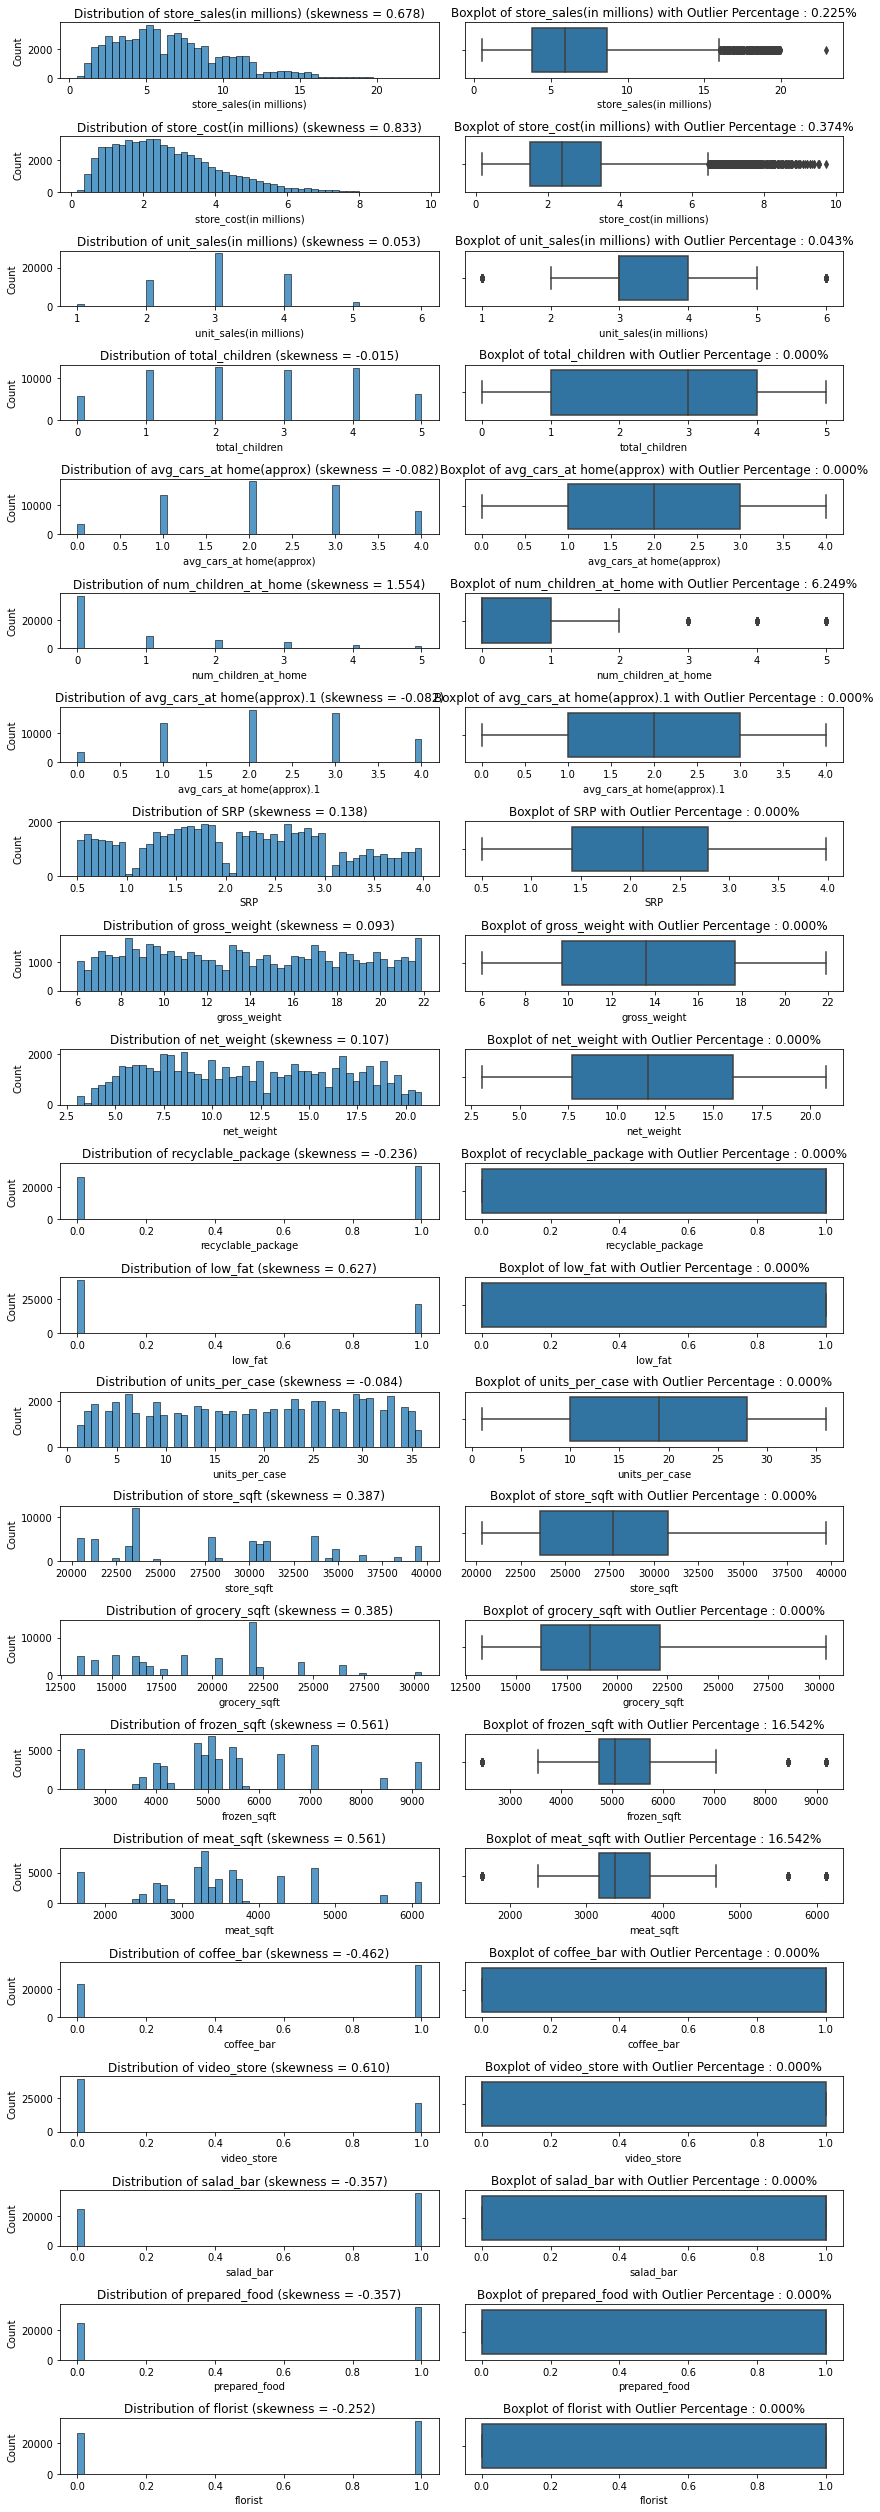

In [12]:
plot_numerical(df, num_cols)

### Check Unique Values

In [13]:
for col in list(df.select_dtypes(['object']).columns):
    print(col)
    print(len(df[col].unique()))
    print(df[col].unique())
    print('')

food_category
45
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']

food_department
22
['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 'Breakfast Foods' 'Checkout' 'Carousel']

f

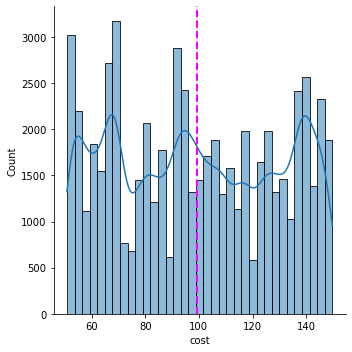

In [96]:
sns.axes_style("darkgrid")
sns.displot(df.cost, kde=True)
plt.axvline(df.cost.mean(), color='magenta', linestyle='dashed', linewidth=2)

In [98]:
df.cost.mean()

99.26236612166926

In [99]:
df.cost.min()

50.79

### Food Catogory

In [14]:
df_copy.food_category.unique()

array(['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods',
       'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy',
       'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat',
       'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages',
       'Seafood', 'Specialty', 'Kitchen Products', 'Electrical',
       'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages',
       'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware',
       'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes',
       'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza',
       'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene',
       'Plastic Products', 'Canned Oysters', 'Packaged Vegetables',
       'Miscellaneous'], dtype=object)

In [15]:
df_copy.food_category.value_counts().head().to_frame()

,food_category
Vegetables,7440
Snack Foods,6919
Dairy,3835
Meat,3107
Fruit,3080


In [16]:
df.groupby('food_category').agg({'cost':['mean', 'min', 'max']})

cost               
                            mean    min     max
food_category                                  
Baking Goods           99.818382  50.79  149.75
Bathroom Products     100.031514  50.79  149.75
Beer and Wine          99.023063  50.79  149.75
Bread                  99.467997  50.79  149.75
Breakfast Foods        99.422138  50.79  149.75
Candles                97.511744  51.12  149.08
Candy                  98.901873  50.79  149.75
Canned Anchovies      102.213944  50.79  149.08
Canned Clams           98.928744  50.79  149.08
Canned Oysters        102.181905  52.06  149.08
Canned Sardines        98.773099  50.79  149.08
Canned Shrimp         100.627857  51.00  149.08
Canned Soup           101.026220  50.79  149.75
Canned Tuna            95.107595  50.79  149.75
Carbonated Beverages   97.740345  50.79  149.75
Cleaning Supplies      99.434305  50.79  149.75
Cold Remedies          97.885739  50.79  149.75
Dairy                  98.735053  50.79  149.75
Decongestants          99.059066  50.79  149.08
Drinks                 98.740155  50.79  149.08
Eggs                   99.674065  51.00  149.75
Electrical             98.684637  50.79  149.75
Frozen Desserts       100.757420  50.79  149.75
Frozen Entrees         97.277429  50.79  149.75
Fruit                  99.150013  50.79  149.75
Hardware               97.892243  50.79  149.75
Hot Beverages          99.061829  50.79  149.75
Hygiene                98.615331  50.79  149.75
Jams and Jellies       99.203784  50.79  149.75
Kitchen Products       99.227874  50.79  149.75
Magazines              98.697467  50.79  149.08
Meat                   99.979582  50.79  149.75
Miscellaneous          98.914742  50.79  149.08
Packaged Vegetables    96.707933  51.12  149.08
Pain Relievers         98.535676  50.79  149.75
Paper Products         99.258112  50.79  149.75
Pizza                 100.119354  50.79  149.75
Plastic Products       99.212872  50.79  149.75
Pure Juice Beverages  100.783263  50.79  149.75
Seafood                99.022373  51.00  149.75
Side Dishes            97.700815  50.79  149.75
Snack Foods            99.650191  50.79  149.75
Specialty              98.085145  50.79  149.08
Starchy Foods          99.116564  50.79  149.75
Vegetables             99.090874  50.79  149.75

In [17]:
df.groupby('food_department').agg({'cost':['mean', 'min', 'max']})

cost               
                           mean    min     max
food_department                               
Alcoholic Beverages   99.023063  50.79  149.75
Baked Goods           99.467997  50.79  149.75
Baking Goods          99.469878  50.79  149.75
Beverages             99.091025  50.79  149.75
Breakfast Foods       99.560398  50.79  149.75
Canned Foods         100.223365  50.79  149.75
Canned Products       99.138600  50.79  149.08
Carousel              99.334133  50.79  148.62
Checkout             100.231740  50.79  149.08
Dairy                 98.735053  50.79  149.75
Deli                  99.769178  50.79  149.75
Eggs                  99.674065  51.00  149.75
Frozen Foods          99.554897  50.79  149.75
Health and Hygiene    99.205366  50.79  149.75
Household             98.816061  50.79  149.75
Meat                  99.209195  50.79  149.08
Periodicals           98.697467  50.79  149.08
Produce               98.680725  50.79  149.75
Seafood               99.022373  51.00  149.75
Snack Foods           99.650191  50.79  149.75
Snacks                98.901873  50.79  149.75
Starchy Foods         99.116564  50.79  149.75

In [18]:
df.groupby('food_family').agg({'cost':['mean', 'min', 'max']})

cost               
                     mean    min     max
food_family                             
Drink           98.968591  50.79  149.75
Food            99.372642  50.79  149.75
Non-Consumable  98.991343  50.79  149.75

### Promotion Name

In [19]:
df.promotion_name.value_counts()

Weekend Markdown           2330
Two Day Sale               2321
Price Savers               2279
Price Winners              2108
Save-It Sale               2001
Super Duper Savers         1986
Super Savers               1930
One Day Sale               1843
Double Down Sale           1755
High Roller Savings        1741
Green Light Days           1702
Shelf Clearing Days        1690
Price Slashers             1647
Free For All               1621
Cash Register Lottery      1555
Go For It                  1521
Two for One                1493
Money Savers               1489
Big Time Discounts         1480
Price Destroyers           1374
Saving Days                1353
Dollar Cutters             1326
Unbeatable Price Savers    1217
Sales Galore               1212
Big Promo                  1172
Dimes Off                  1150
Sales Days                 1107
Price Cutters              1099
You Save Days              1075
Savings Galore             1067
Bag Stuffers               1066
Three fo

In [20]:
df.promotion_name.nunique()

49

In [21]:
df.groupby('promotion_name').agg({'cost':['mean', 'min', 'max']})

cost                
                               mean     min     max
promotion_name                                     
Bag Stuffers             106.627008   70.32  126.62
Best Savings              78.146901   53.29  146.32
Big Promo                 88.193874   51.12  123.88
Big Time Discounts        94.603608   59.40  146.41
Big Time Savings         106.383007   53.45  135.80
Bye Bye Baby             103.677071   58.16  141.39
Cash Register Lottery     74.734129   55.59  123.61
Coupon Spectacular        97.340647   51.47  145.31
Dimes Off                109.473261   84.97  131.58
Dollar Cutters           120.886629   66.18  144.18
Dollar Days              139.827744  138.81  143.04
Double Down Sale          80.373311   50.79  142.71
Double Your Savings      102.381157   94.43  122.16
Fantastic Discounts      134.337286  120.09  137.46
Free For All             105.877051   52.06  148.87
Go For It                 94.455549   66.37  137.17
Green Light Days         104.730711   66.27  139.19
Green Light Special      114.934754   97.13  147.17
High Roller Savings       95.752981   68.15  121.93
I Cant Believe It Sale    83.364496   52.77  132.60
Money Savers              73.720799   53.01  119.55
Mystery Sale             106.266810   68.84  137.47
One Day Sale             110.617862   68.91  146.72
Pick Your Savings        101.718813   56.49  147.17
Price Cutters            121.386715   62.09  145.52
Price Destroyers         111.700997   58.27  148.62
Price Savers              90.589579   54.36  128.20
Price Slashers            69.192283   52.97  100.44
Price Smashers           112.117305   95.45  145.24
Price Winners            101.908937   69.24  147.18
Sale Winners             113.910824   99.38  147.35
Sales Days               113.681066   62.71  142.09
Sales Galore             121.205833   62.40  149.08
Save-It Sale              90.267741   52.42  144.38
Saving Days               92.688899   67.11  118.36
Savings Galore           119.475829   61.65  138.53
Shelf Clearing Days       92.052633   51.16  109.21
Shelf Emptiers           129.375332  101.75  147.82
Super Duper Savers        86.454839   51.00  129.50
Super Savers             114.039731   64.76  144.54
Super Wallet Savers      128.602751   69.15  140.19
Three for One            124.155298  109.09  136.43
Tip Top Savings           96.935835   54.90  142.58
Two Day Sale              99.749095   73.27  149.75
Two for One               73.484200   57.52  123.63
Unbeatable Price Savers  103.976960   66.78  137.77
Wallet Savers             71.939836   53.13  139.36
Weekend Markdown          92.359567   53.23  140.57
You Save Days            114.734400   51.27  131.81

In [121]:
head = df.groupby('promotion_name').agg({'cost':'mean'}).sort_values(by='cost').head(5)
tail = df.groupby('promotion_name').agg({'cost':'mean'}).sort_values(by='cost').tail(5)

In [ ]:
df.loc

In [137]:
head = head.sort_values(by = 'cost',ascending= False)
tail = tail.sort_values(by = 'cost',ascending= False)

In [135]:
head.index.tolist()

['Cash Register Lottery',
 'Money Savers',
 'Two for One',
 'Wallet Savers',
 'Price Slashers']

<AxesSubplot:xlabel='promotion_name', ylabel='cost'>

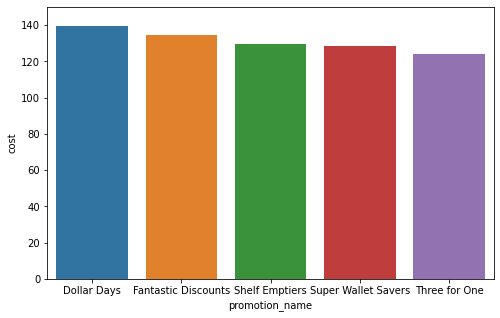

In [138]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set(ylim=(0, 150))
sns.barplot(ax=ax, data = tail,x =tail.index, y='cost')

KeyError: 'Three for One'

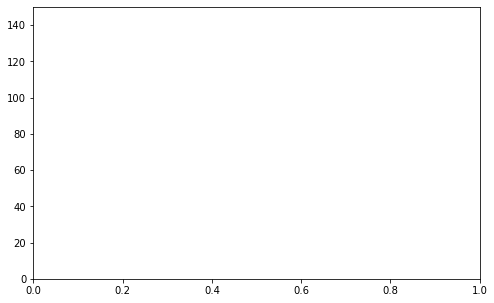

In [136]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set(ylim=(0, 150))

sns.boxplot(x=tail.index.tolist(), y="cost", data=df)

<AxesSubplot:xlabel='promotion_name', ylabel='cost'>

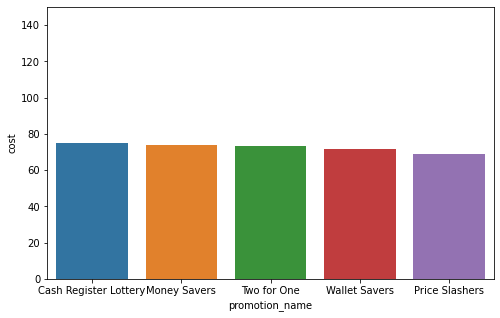

In [129]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set(ylim=(0, 150))
sns.barplot(ax=ax, data = head,x =head.index, y='cost')

### Sales Country

In [22]:
df.groupby('sales_country').agg({'cost':['mean', 'min', 'max']})

cost               
                     mean    min     max
sales_country                           
Canada         101.020363  51.00  147.17
Mexico         100.769256  52.97  148.87
USA             98.402350  50.79  149.75

### Marital Status

In [23]:
df.groupby('marital_status').agg({'cost':['mean', 'min', 'max']})

cost               
                     mean    min     max
marital_status                          
M               99.241225  50.79  149.75
S               99.283311  50.79  149.75

### Education

In [24]:
df.groupby('education').agg({'cost':['mean', 'min', 'max']})

cost               
                          mean    min     max
education                                    
Bachelors Degree     99.553532  50.79  149.75
Graduate Degree      98.755847  51.12  149.75
High School Degree   99.027187  50.79  149.75
Partial College      99.898690  50.79  149.75
Partial High School  99.138837  50.79  149.75

### Member Card

In [25]:
df.groupby('member_card').agg({'cost':['mean', 'min', 'max']})

cost               
                  mean    min     max
member_card                          
Bronze       99.333868  50.79  149.75
Golden       98.831748  50.79  149.75
Normal       99.190471  50.79  149.75
Silver       99.615090  50.79  149.75

### Average Yearly Income

In [26]:
df.groupby('avg. yearly_income').agg({'cost':['mean', 'min', 'max']})

cost               
                          mean    min     max
avg. yearly_income                           
$10K - $30K          99.329848  50.79  149.75
$110K - $130K        98.909347  50.79  149.75
$130K - $150K        98.319229  50.79  149.75
$150K +              99.129356  51.00  149.75
$30K - $50K          99.434719  50.79  149.75
$50K - $70K         100.065537  50.79  149.75
$70K - $90K          98.014146  50.79  149.75
$90K - $110K         99.641838  50.79  149.75

### Store Type

In [27]:
df.groupby('store_type').agg({'cost':['mean', 'min', 'max']})

cost               
                           mean    min     max
store_type                                    
Deluxe Supermarket    94.489040  50.79  149.08
Gourmet Supermarket  103.151424  53.82  149.75
Mid-Size Grocery     112.129796  51.16  148.87
Small Grocery        105.175737  52.42  146.32
Supermarket          100.645427  51.27  147.35

<AxesSubplot:xlabel='store_type', ylabel='cost'>

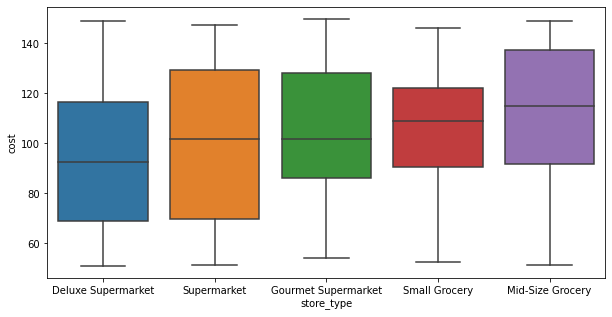

In [141]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='store_type',y='cost',data=df)

### Store City

In [28]:
df.groupby('store_city').agg({'cost':['mean', 'min', 'max']})

cost               
                     mean    min     max
store_city                              
Acapulco        97.962019  52.97  142.09
Bellingham     104.949662  52.42  139.36
Beverly Hills  101.301226  53.82  149.75
Bremerton       98.198047  51.27  145.52
Camacho        106.416803  65.68  147.82
Guadalajara    106.117973  61.27  146.32
Hidalgo        104.230895  54.36  148.62
Los Angeles    101.091965  53.37  147.35
Merida          89.849493  53.29  131.62
Mexico City    116.943670  62.09  148.87
Orizaba        100.261625  55.45  144.31
Portland       105.310988  52.06  145.60
Salem           84.430120  50.79  144.38
San Francisco  104.852746  53.23  145.24
Seattle        103.345274  59.19  145.41
Spokane         94.820186  57.52  136.57
Tacoma          98.447963  51.12  149.08
Vancouver      101.777299  51.00  144.54
Victoria        96.604034  51.16  147.17

<AxesSubplot:xlabel='store_city', ylabel='cost'>

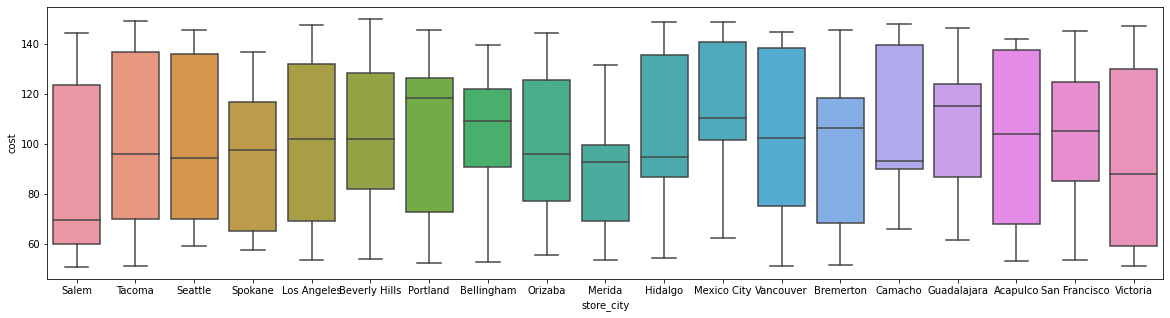

In [147]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='store_city',y='cost',data=df)

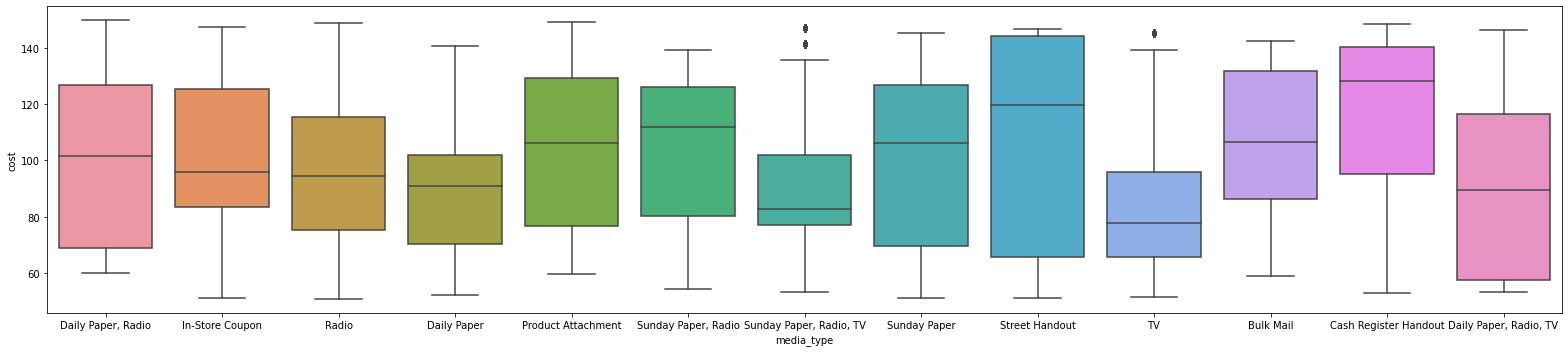

In [152]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x='media_type',y='cost',data=df)
plt.tight_layout()

In [29]:
df.groupby('store_state').agg({'cost':['mean', 'min', 'max']})

cost               
                   mean    min     max
store_state                           
BC           101.020363  51.00  147.17
CA           101.520718  53.23  149.75
DF           116.943670  62.09  148.87
Guerrero      97.962019  52.97  142.09
Jalisco      106.117973  61.27  146.32
OR            94.548343  50.79  145.60
Veracruz     100.261625  55.45  144.31
WA            99.085138  51.12  149.08
Yucatan       89.849493  53.29  131.62
Zacatecas    104.953692  54.36  148.62

### Media Type

In [30]:
df_copy.media_type.value_counts()

Daily Paper, Radio         6820
Product Attachment         5371
Daily Paper, Radio, TV     5284
Daily Paper                5119
Street Handout             5069
Radio                      4980
Sunday Paper               4859
In-Store Coupon            4495
Sunday Paper, Radio        4050
Cash Register Handout      4002
TV                         3576
Bulk Mail                  3457
Sunday Paper, Radio, TV    3346
Name: media_type, dtype: int64

In [31]:
df.groupby('media_type').agg({'cost':['mean', 'min', 'max']})

cost               
                               mean    min     max
media_type                                        
Bulk Mail                104.087744  59.02  142.45
Cash Register Handout    114.935647  53.01  148.62
Daily Paper               89.223149  52.06  140.57
Daily Paper, Radio        97.971450  59.86  149.75
Daily Paper, Radio, TV    90.753003  53.13  146.41
In-Store Coupon           99.993493  51.16  147.35
Product Attachment       104.336822  59.83  149.08
Radio                     96.703759  50.79  148.87
Street Handout           108.685326  51.00  146.72
Sunday Paper             101.230712  51.12  145.31
Sunday Paper, Radio      105.687131  54.36  139.25
Sunday Paper, Radio, TV   90.965377  53.23  147.18
TV                        85.941692  51.47  145.24

# 5. Data Preprocessing

In [32]:
# split train and test data
train, test = train_test_split(df_copy, test_size=0.2, random_state=50)

In [33]:
cat_train = train[cat_cols]
cat_train.reset_index(inplace=True, drop=True)

In [34]:
num_train = train[num_cols]
num_train.reset_index(inplace=True, drop=True)

In [35]:
# encoding the categorical data

ordinal = OrdinalEncoder()
encoderdf = pd.DataFrame(ordinal.fit_transform(train[cat_cols]), columns = cat_cols)
encoderdf



,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
0,43.0,21.0,1.0,24.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,30.0,1.0,2.0,1.0,6.0
1,26.0,3.0,0.0,14.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,6.0,69.0,4.0,11.0,5.0,2.0
2,41.0,19.0,1.0,35.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,58.0,4.0,10.0,6.0,6.0
3,21.0,14.0,2.0,24.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,96.0,0.0,17.0,0.0,1.0
4,4.0,4.0,1.0,38.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,4.0,62.0,0.0,16.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48337,4.0,4.0,1.0,11.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,7.0,63.0,0.0,16.0,7.0,12.0
48338,21.0,14.0,2.0,15.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,96.0,4.0,3.0,7.0,7.0
48339,4.0,12.0,1.0,3.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,79.0,4.0,15.0,7.0,5.0
48340,8.0,5.0,1.0,39.0,2.0,0.0,0.0,0.0,3.0,3.0,1.0,6.0,14.0,4.0,15.0,7.0,10.0


**Feature Selection Using Mutual Regression**

Untuk memilih feature yang akan digunakan pada model, saya memakai metode mutual regression.

In [36]:
train_1 = pd.concat([num_train,encoderdf],axis =1)
train_1

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
0,3.22,1.0304,2.0,2.0,3.0,0.0,3.0,1.61,16.0,14.0,1.0,0.0,7.0,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,43.0,21.0,1.0,24.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,30.0,1.0,2.0,1.0,6.0
1,8.52,3.4932,4.0,1.0,4.0,1.0,4.0,2.13,14.9,12.8,0.0,0.0,9.0,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,26.0,3.0,0.0,14.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,6.0,69.0,4.0,11.0,5.0,2.0
2,6.81,3.2007,3.0,2.0,1.0,0.0,1.0,2.27,19.6,17.6,0.0,0.0,6.0,34791.0,26354.0,5062.0,3375.0,0.0,0.0,1.0,1.0,0.0,41.0,19.0,1.0,35.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,58.0,4.0,10.0,6.0,6.0
3,8.85,4.2480,3.0,2.0,4.0,2.0,4.0,2.95,17.9,14.8,1.0,0.0,10.0,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,21.0,14.0,2.0,24.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,96.0,0.0,17.0,0.0,1.0
4,7.72,2.7020,4.0,5.0,3.0,0.0,3.0,1.93,21.6,20.6,1.0,1.0,33.0,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,4.0,4.0,1.0,38.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,4.0,62.0,0.0,16.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48337,4.70,1.5040,2.0,3.0,3.0,1.0,3.0,2.35,21.2,19.2,0.0,1.0,6.0,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,4.0,4.0,1.0,11.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,7.0,63.0,0.0,16.0,7.0,12.0
48338,4.80,1.9680,2.0,1.0,4.0,0.0,4.0,2.40,14.5,12.5,1.0,0.0,29.0,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,21.0,14.0,2.0,15.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,96.0,4.0,3.0,7.0,7.0
48339,2.20,1.0560,4.0,4.0,0.0,2.0,0.0,0.55,15.9,14.8,0.0,0.0,29.0,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,1.0,3.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,79.0,4.0,15.0,7.0,5.0
48340,5.07,1.8252,3.0,5.0,3.0,1.0,3.0,1.69,16.7,14.7,1.0,1.0,30.0,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,1.0,39.0,2.0,0.0,0.0,0.0,3.0,3.0,1.0,6.0,14.0,4.0,15.0,7.0,10.0


In [37]:

mutual_info = mutual_info_regression(train_1,train[target_col])
mutual_info

array([0.00000000e+00, 6.08837764e-03, 7.46320029e-02, 7.56052736e-02,
       6.40023892e-02, 7.16176407e-02, 6.69946630e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.77921887e-03, 5.90626390e-03,
       4.07460191e-05, 2.73452610e+00, 2.73205939e+00, 2.73346009e+00,
       2.72454562e+00, 6.07952609e-01, 5.88889880e-01, 6.19632721e-01,
       6.17848693e-01, 6.65996655e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.77448044e+00, 8.15619842e-01, 1.28399937e-02,
       1.01371882e-02, 5.12782531e-02, 4.29525960e-02, 5.88212160e-02,
       1.28505759e-02, 1.00779133e-01, 0.00000000e+00, 1.15826736e+00,
       2.72166771e+00, 1.92690832e+00, 2.54016871e+00])

In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_1.columns
mutual_info.sort_values(ascending=False)

promotion_name                3.774480
store_sqft                    2.734526
frozen_sqft                   2.733460
grocery_sqft                  2.732059
meat_sqft                     2.724546
store_city                    2.721668
media_type                    2.540169
store_state                   1.926908
store_type                    1.158267
sales_country                 0.815620
florist                       0.665997
salad_bar                     0.619633
prepared_food                 0.617849
coffee_bar                    0.607953
video_store                   0.588890
avg. yearly_income            0.100779
total_children                0.075605
unit_sales(in millions)       0.074632
num_children_at_home          0.071618
avg_cars_at home(approx).1    0.066995
avg_cars_at home(approx)      0.064002
occupation                    0.058821
education                     0.051278
member_card                   0.042953
houseowner                    0.012851
marital_status           

Dari perhitungan mutual information, saya ambil fitur yang memilikin nilai mutual info lebih dari 1. Untuk kolom store_state tidak saya ambil karena sudah diwakilkan dari store_city

**Selected Features**

In [39]:

feature_num = ['grocery_sqft','store_sqft', 'frozen_sqft', 'meat_sqft']
feature_cat = ['promotion_name', 'media_type', 'store_city','store_type']
target = ['cost']


In [40]:
# select feature for train and test data
train_selected = train[feature_num + feature_cat + target]
test_selected = test[feature_num + feature_cat + target]
train_selected.head(3)

,grocery_sqft,store_sqft,frozen_sqft,meat_sqft,promotion_name,media_type,store_city,store_type,cost
17335,15337.0,23688.0,5011.0,3340.0,Price Cutters,Product Attachment,Beverly Hills,Gourmet Supermarket,129.20
13698,16232.0,20319.0,2452.0,1635.0,Free For All,Daily Paper,Portland,Supermarket,52.06
55317,26354.0,34791.0,5062.0,3375.0,Savings Galore,Product Attachment,Orizaba,Supermarket,105.19


In [41]:
print('Train Size : ', train_selected.shape)
print('Test Size  : ', test_selected.shape)

Train Size :  (48342, 9)
Test Size  :  (12086, 9)


Terdapat 9 Fitur dan 1 Target kolom dengan 48342 data train & 12086 data test.

###  Data for model inference

In [42]:
# Get Data for Model Inference
df_inf = train_selected.sample(10, random_state=420)
df_inf

,grocery_sqft,store_sqft,frozen_sqft,meat_sqft,promotion_name,media_type,store_city,store_type,cost
46345,22063.0,30268.0,4923.0,3282.0,Price Destroyers,"Daily Paper, Radio",Spokane,Supermarket,62.26
33644,20141.0,30797.0,6393.0,4262.0,Money Savers,TV,Merida,Deluxe Supermarket,65.70
18324,14210.0,23598.0,5633.0,3755.0,Sale Winners,In-Store Coupon,Los Angeles,Supermarket,147.35
31254,15337.0,23688.0,5011.0,3340.0,Sales Galore,Bulk Mail,Beverly Hills,Gourmet Supermarket,96.55
26122,22271.0,28206.0,3561.0,2374.0,Go For It,Radio,Bellingham,Small Grocery,73.02
57836,15337.0,23688.0,5011.0,3340.0,One Day Sale,"Daily Paper, Radio, TV",Beverly Hills,Gourmet Supermarket,85.88
16311,16232.0,20319.0,2452.0,1635.0,Price Destroyers,Sunday Paper,Portland,Supermarket,121.44
26543,30351.0,38382.0,4819.0,3213.0,Price Winners,Product Attachment,Hidalgo,Mid-Size Grocery,86.79
5509,30351.0,38382.0,4819.0,3213.0,One Day Sale,Street Handout,Hidalgo,Mid-Size Grocery,146.72
59316,13305.0,21215.0,4746.0,3164.0,Unbeatable Price Savers,Bulk Mail,Seattle,Supermarket,66.78


In [43]:
# Remove Inference-Set from Dataset
train_selected = train_selected.drop(df_inf.index)
train_selected.shape

(48332, 9)

In [44]:
# Reset Index 
train_selected.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

**Outlier Handling**

In [45]:
# Defining a function to analyze outlier in the data
def outlier_analysis(df, col):
    skewness = df[col].skew()
    if skewness >= 0.5 and skewness<=0.5:
        upper = df[col].mean() + 3*df[col].std()
        lower = df[col].mean() - 3*df[col].std()
        method = 'Z-Score'
    else:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 3)
        lower_bound = q1 - (iqr * 3)
        method = 'IQR'

    outlier = df.loc[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    return outlier, method, upper_bound, lower_bound

In [46]:
# using for loop to go through every numerical column and handle their outliers
for col in feature_num:
    out, method, up, low = outlier_analysis(train, col)
    pct_out = (len(out)/len(train))*100
    
    # if outliers percentage is under 5%, we will drop the data
    if pct_out <= 5:
        train_selected = train_selected[(train_selected[col]>=low) & (train_selected[col]<=up)]
    # if outliers percentage is over 5%, we will cap the outliers 
    else:
        train_selected[col] = train_selected[col].apply(lambda x: up if x>=up else low if x<=low else x)

In [47]:
train_selected.shape

(48332, 9)

### Splitting between `X` (Features) and `y` (Target)

In [48]:
# Split between Train-Set and Test-Set
X_train = train_selected[feature_num + feature_cat]
X_test = test_selected[feature_num + feature_cat]
y_train = train_selected[target]
y_test = test_selected[target]

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (48332, 8)
Test Size  :  (12086, 8)


In [49]:
# Split between numerical and categorical features
X_train_num = X_train[feature_num]
X_train_cat = X_train[feature_cat]

X_test_num = X_test[feature_num]
X_test_cat = X_test[feature_cat]

In [50]:
X_train_cat.nunique()

promotion_name    49
media_type        13
store_city        19
store_type         5
dtype: int64

### Feature scaling

In [51]:
# finding the suitable scaling method for feature scaling
norm = 0
nonorm = 0
for col in X_train_num.columns:
    if X_train_num[col].skew() >=-0.5 and train[col].skew() <0.5:
        norm += 1
    else:
        nonorm +=1
        
    if norm > nonorm:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [52]:
# Feature scaling using MinMax Scaler
scaled_X_train = scaler.fit_transform(X_train_num)
scaled_X_test = scaler.transform(X_test_num)

scaled_X_train

array([[0.11920685, 0.17386592, 0.40528983, 0.40508434],
       [0.17171184, 0.        , 0.        , 0.        ],
       [0.76551684, 0.74686484, 0.41336712, 0.41339986],
       ...,
       [0.51378623, 0.51344377, 0.39135255, 0.39130435],
       [0.51378623, 0.51344377, 0.39135255, 0.39130435],
       [0.11826822, 0.11142076, 0.29173266, 0.29175576]])

### Feature Encoding

In [53]:
# using Ordinal encoder to encode the categorical data
encoder = OrdinalEncoder()

encoded_X_train = pd.DataFrame(encoder.fit_transform(X_train_cat),columns = feature_cat)
encoded_X_test = pd.DataFrame(encoder.transform(X_test_cat), columns = feature_cat)
encoded_X_train

,promotion_name,media_type,store_city,store_type
0,24.0,6.0,2.0,1.0
1,14.0,2.0,11.0,4.0
2,35.0,6.0,10.0,4.0
3,24.0,1.0,17.0,0.0
4,38.0,9.0,16.0,0.0
...,...,...,...,...
48327,11.0,12.0,16.0,0.0
48328,15.0,7.0,3.0,4.0
48329,3.0,5.0,15.0,4.0
48330,39.0,10.0,15.0,4.0


### Concate between numerical features and categorical features

In [54]:
# Concate Columns
X_train_final = np.concatenate([scaled_X_train,encoded_X_train ], axis=1)
X_test_final = np.concatenate([scaled_X_test, encoded_X_test], axis=1)

In [55]:
# Create DataFrame of `X_train_final` and `X_test_final_df`
X_train_final_df = pd.DataFrame(X_train_final, columns=[feature_num+feature_cat])
X_test_final_df = pd.DataFrame(X_test_final, columns=[feature_num+feature_cat])
X_train_final_df

,grocery_sqft,store_sqft,frozen_sqft,meat_sqft,promotion_name,media_type,store_city,store_type
0,0.119207,0.173866,0.405290,0.405084,24.0,6.0,2.0,1.0
1,0.171712,0.000000,0.000000,0.000000,14.0,2.0,11.0,4.0
2,0.765517,0.746865,0.413367,0.413400,35.0,6.0,10.0,4.0
3,0.182623,0.144140,0.247704,0.247802,24.0,1.0,17.0,0.0
4,0.517306,0.698715,0.726798,0.726776,38.0,9.0,16.0,0.0
...,...,...,...,...,...,...,...,...
48327,0.517306,0.698715,0.726798,0.726776,11.0,12.0,16.0,0.0
48328,0.650299,1.000000,1.000000,1.000000,15.0,7.0,3.0,4.0
48329,0.513786,0.513444,0.391353,0.391304,3.0,5.0,15.0,4.0
48330,0.513786,0.513444,0.391353,0.391304,39.0,10.0,15.0,4.0


# 6. Model Definition & Hyper Parameter Tuning

Model yang akan diterapkan pada kasus ini adalah 
1. Lasso Regression
2. Decision Tree Model
3. Random Forest
4. XG Boost

### Lasso Regression

In [56]:
# Lasso Regression Model
lasreg = Lasso()

In [57]:
# Train the Model using gridCV

lasparam_grid={"alpha": np.linspace(0,2, num=100), 
                }


linreg_cv=GridSearchCV(lasreg, lasparam_grid, cv=10, scoring='r2')

### Decision Tree Regressor Model

In [58]:
# Decision Tree Regressor Model
dtr = DecisionTreeRegressor()

In [59]:
dtr_grid={  'criterion' : ['squared_error', 'absolute_error']
            ,'splitter':['best', 'random'] }


dtr_cv=RandomizedSearchCV(dtr, dtr_grid, cv=3, scoring='r2')

### Random Forest Regressor

In [60]:
random = RandomForestRegressor()

In [61]:
random_grid={ 'n_estimators' : [100,500,1000, None] ,
            
                }


random_cv=GridSearchCV(random, random_grid, cv=3, scoring='r2')

### XG Boost Regression

In [62]:
# XG Boost
xgb = XGBRegressor()


In [63]:
xg_grid={ 'max_depth' : [5,6,7] ,
            
                }


xgb_cv=GridSearchCV(random, xg_grid, cv=3, scoring='r2')

# 7. Model Training

In [64]:
# train Lasso regression model with our train data
linreg_cv.fit(X_train_final_df, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0...
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494949,
       1.51515152, 1.53535354, 1.55555556, 1.57575758, 1.5959596 ,
       1.61616162, 1.63636364, 1.65656566, 1.67676768, 1.6969697 ,
       1.71717172, 1.73737374, 1.75757576, 1.77777778, 1.7979798 ,
       1.81818182, 1.83838384, 1.85858586, 1.87878788, 1.8989899 ,
       1.91919192, 1.93939394, 1.95959596, 1.97979798, 2.        ])},
             scoring='r2')

In [65]:
linreg_cv.best_params_

{'alpha': 0.0}

In [66]:
# train Lasso regression model with our train data
dtr_cv.fit(X_train_final_df, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [67]:
dtr_cv.best_params_

{'splitter': 'best', 'criterion': 'squared_error'}

In [68]:
# train Random Forest regression model with our train data
random_cv.fit(X_train_final_df, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 500, 1000, None]}, scoring='r2')

In [69]:
random_cv.best_params_

{'n_estimators': 1000}

In [70]:
# train XG Boost regression model with our train data
xgb_cv.fit(X_train_final_df, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7]}, scoring='r2')

In [71]:
xgb_cv.best_params_

{'max_depth': 7}

In [72]:
xgb.fit(X_train_final_df, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# 8. Model Evaluation

### Lasso Regression

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_tr = linreg_cv.predict(X_train_final_df)
y_pred_ts = linreg_cv.predict(X_test_final_df)

print('====== Training ======')
print('RMSE:',mean_squared_error(y_train,y_pred_tr,squared=False))
print('R2-score:',r2_score(y_train,y_pred_tr))

print('\n====== Test ======')
print('RMSE:',mean_squared_error(y_test,y_pred_ts,squared=False))
print('R2-score:',r2_score(y_test,y_pred_ts))

====== Training ======
RMSE: 29.880606060537456
R2-score: 0.010622725724433457

====== Test ======
RMSE: 29.720259083823553
R2-score: 0.01132664247133841


Dari hasil lasso regression dengan hyperparameter terbaik yang digunakan adalah alpha = 0, ini sebenarnya sama dengan linear regression biasa. Hasilnya masih kurang baik.

### Decision Tree

In [74]:
y_pred_tr = dtr_cv.predict(X_train_final_df)
y_pred_ts = dtr_cv.predict(X_test_final_df)

print('====== Training ======')
print('RMSE:',mean_squared_error(y_train,y_pred_tr,squared=False))
print('R2-score:',r2_score(y_train,y_pred_tr))

print('\n====== Test ======')
print('RMSE:',mean_squared_error(y_test,y_pred_ts,squared=False))
print('R2-score:',r2_score(y_test,y_pred_ts))

====== Training ======
RMSE: 1.3178736193820968
R2-score: 0.9980754435424596

====== Test ======
RMSE: 1.5181924052372024
R2-score: 0.9974201094715951


### Random Forest

In [75]:
y_pred_tr = random_cv.predict(X_train_final_df)
y_pred_ts = random_cv.predict(X_test_final_df)

print('====== Training ======')
print('RMSE:',mean_squared_error(y_train,y_pred_tr,squared=False))
print('R2-score:',r2_score(y_train,y_pred_tr))

print('\n====== Test ======')
print('RMSE:',mean_squared_error(y_test,y_pred_ts,squared=False))
print('R2-score:',r2_score(y_test,y_pred_ts))

====== Training ======
RMSE: 1.3178774583616233
R2-score: 0.9980754323299375

====== Test ======
RMSE: 1.5175322481039262
R2-score: 0.9974223526165904


### XG Boost

In [76]:
y_pred_tr = xgb_cv.predict(X_train_final_df)
y_pred_ts = xgb_cv.predict(X_test_final_df)

print('====== Training ======')
print('RMSE:',mean_squared_error(y_train,y_pred_tr,squared=False))
print('R2-score:',r2_score(y_train,y_pred_tr))

print('\n====== Test ======')
print('RMSE:',mean_squared_error(y_test,y_pred_ts,squared=False))
print('R2-score:',r2_score(y_test,y_pred_ts))

====== Training ======
RMSE: 20.60016236705032
R2-score: 0.5297547541789611

====== Test ======
RMSE: 20.277599971619498
R2-score: 0.5397638251959853


### XG Boost Without Parameter Tuning

In [77]:
y_pred_tr = xgb.predict(X_train_final_df)
y_pred_ts = xgb.predict(X_test_final_df)

print('====== Training ======')
print('RMSE:',mean_squared_error(y_train,y_pred_tr,squared=False))
print('R2-score:',r2_score(y_train,y_pred_tr))

print('\n====== Test ======')
print('RMSE:',mean_squared_error(y_test,y_pred_ts,squared=False))
print('R2-score:',r2_score(y_test,y_pred_ts))

====== Training ======
RMSE: 1.3271455441093432
R2-score: 0.9980482677731766

====== Test ======
RMSE: 1.5252915350029803
R2-score: 0.997395925714159


Dari Hasil pemodelan decision tree dan random forest memiliki hasil yang paling baik dan hasilnya cukup mirip.
Hasil XG boost masih kurang memuaskan dengan penggunaan hyper parameter tuning. Hal ini mungkin masih diperlukan pencarian yang lebih optimal namun XG boost tanpa hyper parameter juga mengeluarkan hasil yang cukup baik.


# 9. Pipeline

In [78]:
num_pipeline = Pipeline([
                        ('outliers', Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold=1.5,
                        variables= feature_num)),
                        ('scaler', MinMaxScaler())
                        ])

cat_pipeline = Pipeline([('encoding', OrdinalEncoder())
                        ])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipeline, feature_num),
    ('cat', cat_pipeline, feature_cat)
])

pipe = Pipeline([('preprocessing', preprocess), ('classifier', random_cv)], memory='cache_folder')


numeric = num_pipeline.fit_transform(X_train_num)
categoric = cat_pipeline.fit_transform(X_train_cat)

Saat melakukan proses pipeline pada model yang akan diimplementasikan pada model inference, saya lakukan tahapan berdasarkan yang sudah dilakukan sebelumnya. 
Namun pada tahapan outlier handling sy gunakan winsorizer agar bisa dimasukan pada proses pipeline.

# 9. Model Inference

In [79]:
df_inf.head(3)

,grocery_sqft,store_sqft,frozen_sqft,meat_sqft,promotion_name,media_type,store_city,store_type,cost
0,22063.0,30268.0,4923.0,3282.0,Price Destroyers,"Daily Paper, Radio",Spokane,Supermarket,62.26
1,20141.0,30797.0,6393.0,4262.0,Money Savers,TV,Merida,Deluxe Supermarket,65.70
2,14210.0,23598.0,5633.0,3755.0,Sale Winners,In-Store Coupon,Los Angeles,Supermarket,147.35


In [80]:
X_inf = df_inf.drop(columns='cost')
y_inf = df_inf['cost']

pipe.fit(X_inf,y_inf)
y_inf_pred = pipe.predict(df_inf)

In [81]:
y_inf_pred

array([ 70.2821,  91.8289, 120.3462,  97.2275,  85.643 ,  93.563 ,
       109.1787,  97.032 , 120.8747,  80.4422])

In [82]:
y_inf_pred_df = pd.DataFrame(y_inf_pred, columns= ['cost pred'])

In [83]:
pd.concat([df_inf,y_inf_pred_df],axis=1)

,grocery_sqft,store_sqft,frozen_sqft,meat_sqft,promotion_name,media_type,store_city,store_type,cost,cost pred
0,22063.0,30268.0,4923.0,3282.0,Price Destroyers,"Daily Paper, Radio",Spokane,Supermarket,62.26,70.2821
1,20141.0,30797.0,6393.0,4262.0,Money Savers,TV,Merida,Deluxe Supermarket,65.70,91.8289
2,14210.0,23598.0,5633.0,3755.0,Sale Winners,In-Store Coupon,Los Angeles,Supermarket,147.35,120.3462
3,15337.0,23688.0,5011.0,3340.0,Sales Galore,Bulk Mail,Beverly Hills,Gourmet Supermarket,96.55,97.2275
4,22271.0,28206.0,3561.0,2374.0,Go For It,Radio,Bellingham,Small Grocery,73.02,85.6430
5,15337.0,23688.0,5011.0,3340.0,One Day Sale,"Daily Paper, Radio, TV",Beverly Hills,Gourmet Supermarket,85.88,93.5630
6,16232.0,20319.0,2452.0,1635.0,Price Destroyers,Sunday Paper,Portland,Supermarket,121.44,109.1787
7,30351.0,38382.0,4819.0,3213.0,Price Winners,Product Attachment,Hidalgo,Mid-Size Grocery,86.79,97.0320
8,30351.0,38382.0,4819.0,3213.0,One Day Sale,Street Handout,Hidalgo,Mid-Size Grocery,146.72,120.8747
9,13305.0,21215.0,4746.0,3164.0,Unbeatable Price Savers,Bulk Mail,Seattle,Supermarket,66.78,80.4422


Pada model inference hasil agak berbeda dengan model evaluasi sebelumnya, karena nilai prediksi bisa berbeda sampai sebesar 20. Hal ini mungkin ada perbedaan perhitungan pada proses pipeline

# 10. Conclusion

Dari hasil EDA dan Feature Selection dapat disimpulkan bahwa yang mempengaruhi cost advertising paling tinggi adalah :

- promotion_name  / Jenis Promosi yang dilakukan,
- Luas masing-masing departement pada store yaitu meat_sqft, frozen_sqft, grocery_sqft, store_sqft, juga mempengaruhi cost                     
- media_typ: tipe media untuk promosi          
- store_city  : kota lokasi pada store 
- store_type : tipe store juga berpengaruh     

Model terbaik dari semua percobaan yang dilakukan adalah random forest & decision dengan tingkat akurasi 0.99